# Inferencia de Inteligencia Artificial


## Introducción a la Inteligencia Artificial para datos satelitales


La Observación de la Tierra, a través de satélites, drones y otras tecnologías avanzadas, nos permite observar nuestro planeta con un detalle sin precedentes. En particular, el sistema de satélites Copernicus entrega 12 TB de datos de EO por día. Esta gran cantidad de datos sirve como base para la toma de decisiones informadas y la formulación de políticas.

Sin embargo, la verdadera magia ocurre cuando se aplica la IA a los datos de EO. Los algoritmos de IA destacan por procesar grandes cantidades de información, identificar patrones y hacer predicciones. En el contexto de la EO, la IA puede procesar imágenes satelitales para monitorear cambios en la vegetación, rastrear el movimiento de los glaciares, predecir patrones climáticos e incluso evaluar la salud de los ecosistemas. Este poder analítico brinda a los tomadores de decisiones inteligencia procesable para abordar los desafíos ambientales de manera proactiva.

Sólo algunos ejemplos de la intersección entre IA y EO:

- Agricultura de precisión.
- Optimización de la ubicación de las piscifactorías.
- Pronóstico de inundaciones y niveles de agua.
- Detección de recursos forestales.
- Detección de floraciones de algas en lagos urbanos.
- Planificación de recursos de energía renovable.
- ¡Y muchos más!

Un ejemplo de producto generado con datos de EO utilizando IA es el [_Land Use Land Cover mapping_](https://www.impactobservatory.com/maps-for-good/), que utiliza _deep learning_ para clasificar las categorías de uso y cobertura del suelo a nivel mundial utilizando imágenes de Sentinel-2.

<div style="text-align: center;">
    <img src="https://www.impactobservatory.com/static/cf62cbc8e94e150b7e94405e2763e611/23334/amazon-river.webp" style="width: 50%;">
</div>


## API de IA de SPAI

SPAI cuenta con su API de Inteligencia Artficial, que se puede llamar para aplicar diferentes modelos a nuestras imágenes satelitales. Aunque cuenta con diferentes modelos, como por ejemplo para detectar inundaciones, nubes o clasificar una imagen por uso del suelo, para este taller hemos abierto un modelo de segmentación para extraer carreteras a partir de una imagen óptica.

> Ahora las llamadas se hacen vía API, pero estamos trabajando para encapsularlo en funciones y hacerlo mucho más fácil.

Antes de nada, importamos las librerías necesarias.


In [1]:
import requests
import numpy as np
from PIL import Image
import io
import rasterio as rio
import matplotlib.pyplot as plt

Ahora hacemos una llamada a la API de SPAI, para comprobar que funcione.


In [ ]:
url = "https://spai.ai.earthpulse.ai/"
endpoint = "road-segmentation"

res = requests.get(url)
res.status_code, res.json()

Para este taller, hemos guardado una imagen de Cabo Verde de SPOT, de 1.5 metros de resolución espacial y del 20 de octubre del 2022.


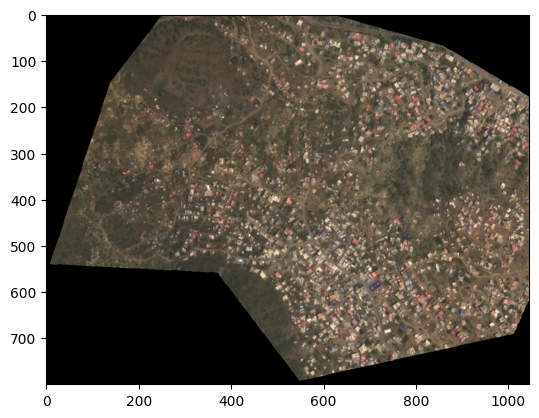

In [13]:
spot = "data/SPOT_2022-10-20.tif"
with rio.open(spot) as src:
    image = src.read([1, 2, 3])
    image = np.clip(image, 0, 255)

plt.imshow(image.transpose(1, 2, 0))

Y ahora, sin más, ¡pasamos la imagen de SPOT a la API! El procesado y la inferencia se ejecutará en la nube, en el entorno de la API de SPAI.


In [ ]:
res = requests.post(url + endpoint, files={"image": open(spot, "rb")})
if res.status_code != 200:
    print(res.json())
res.status_code

Y visualizamos la respuesta, la máscara con las carreteras segmentadas.


In [ ]:
image_bytes = io.BytesIO(res.content)
img = Image.open(image_bytes)

array = np.array(img)

plt.imshow(array)

array.shape, array.dtype, array.min(), array.max()

¡Os animamos a probar con vuestras imágenes! El modelo está entrenado para utilizar imágenes de alta resolución, por lo que se le pueden pasar imágenes de resolución media como de Sentinel-2 pero los resultados no serán tan buenos como con imágenes de SPOT, por ejemplo. ¡Probadlo!


## ¿Qué sigue?

En este apartado hemos visto como llamar a la API de IA de SPAI, para el modelo de segmentación de carreteras. ¡Si queréis ver nuestros otros modelos, no dudéis en contactar con nosotros!

Hasta ahora, hemos visto las diferentes funcionalidades de la librería y la CLI de SPAI para los datos satelitales, desde el acceso a datos, su procesado con algoritmos clásicos o con modelos de IA. Ahora, pasamos a la última parte: cómo desplegar un proyecto de SPAI en la nube, para poder utilizar toda la potencia del _cloud computing_ y poder acceder a nuestras APIs, Notebooks o UIs. Vamos a la siguiente notebook: [05_despliegue](05_despliegue.ipynb).
